# Gramener Case Study

The analysis is divided into four main parts:

1. Data understanding
2. Data cleaning (cleaning missing values, removing redundant columns etc.)
3. Data Analysis
4. Recommendations

### Importing required libraries to perform analysis

In [58]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

### Importing Dataset

In [59]:
loan = pd.read_csv("./loan.csv")

C:\Users\user\anaconda3\lib\site-packages\IPython\core\interactiveshell.py:3063: DtypeWarning: Columns (47) have mixed types.Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


## Step1:- Data Understanding

**Inspecting the data frame**

In [60]:
# first few rows of the dataset
loan.head()

,id,member_id,loan_amnt,funded_amnt,funded_amnt_inv,term,int_rate,installment,grade,sub_grade,...,num_tl_90g_dpd_24m,num_tl_op_past_12m,pct_tl_nvr_dlq,percent_bc_gt_75,pub_rec_bankruptcies,tax_liens,tot_hi_cred_lim,total_bal_ex_mort,total_bc_limit,total_il_high_credit_limit
0,1077501,1296599,5000,5000,4975.0,36 months,10.65%,162.87,B,B2,...,NaN,NaN,NaN,NaN,0.0,0.0,NaN,NaN,NaN,NaN
1,1077430,1314167,2500,2500,2500.0,60 months,15.27%,59.83,C,C4,...,NaN,NaN,NaN,NaN,0.0,0.0,NaN,NaN,NaN,NaN
2,1077175,1313524,2400,2400,2400.0,36 months,15.96%,84.33,C,C5,...,NaN,NaN,NaN,NaN,0.0,0.0,NaN,NaN,NaN,NaN
3,1076863,1277178,10000,10000,10000.0,36 months,13.49%,339.31,C,C1,...,NaN,NaN,NaN,NaN,0.0,0.0,NaN,NaN,NaN,NaN
4,1075358,1311748,3000,3000,3000.0,60 months,12.69%,67.79,B,B5,...,NaN,NaN,NaN,NaN,0.0,0.0,NaN,NaN,NaN,NaN


In [61]:
# total no. of rows and columns in the dataset
loan.shape

(39717, 111)

In [62]:
# all the column names
loan.columns

Index(['id', 'member_id', 'loan_amnt', 'funded_amnt', 'funded_amnt_inv',
       'term', 'int_rate', 'installment', 'grade', 'sub_grade',
       ...
       'num_tl_90g_dpd_24m', 'num_tl_op_past_12m', 'pct_tl_nvr_dlq',
       'percent_bc_gt_75', 'pub_rec_bankruptcies', 'tax_liens',
       'tot_hi_cred_lim', 'total_bal_ex_mort', 'total_bc_limit',
       'total_il_high_credit_limit'],
      dtype='object', length=111)

Some of the important columns in the dataset are 'loan_amnt', 'term', 'int_rate', 'grade', 'sub_grade', 'annual_inc', 'purpose' of the loan etc.

The **target variable**, which we want to compare across the independent variables, is 'loan_status'. The strategy is to figure out compare the average default rates across various independent variables and identify the ones that affect default rate the most.

In [63]:
loan.describe()

,id,member_id,loan_amnt,funded_amnt,funded_amnt_inv,installment,annual_inc,dti,delinq_2yrs,inq_last_6mths,...,num_tl_90g_dpd_24m,num_tl_op_past_12m,pct_tl_nvr_dlq,percent_bc_gt_75,pub_rec_bankruptcies,tax_liens,tot_hi_cred_lim,total_bal_ex_mort,total_bc_limit,total_il_high_credit_limit
count,3.971700e+04,3.971700e+04,39717.000000,39717.000000,39717.000000,39717.000000,3.971700e+04,39717.000000,39717.000000,39717.000000,...,0.0,0.0,0.0,0.0,39020.000000,39678.0,0.0,0.0,0.0,0.0
mean,6.831319e+05,8.504636e+05,11219.443815,10947.713196,10397.448868,324.561922,6.896893e+04,13.315130,0.146512,0.869200,...,NaN,NaN,NaN,NaN,0.043260,0.0,NaN,NaN,NaN,NaN
std,2.106941e+05,2.656783e+05,7456.670694,7187.238670,7128.450439,208.874874,6.379377e+04,6.678594,0.491812,1.070219,...,NaN,NaN,NaN,NaN,0.204324,0.0,NaN,NaN,NaN,NaN
min,5.473400e+04,7.069900e+04,500.000000,500.000000,0.000000,15.690000,4.000000e+03,0.000000,0.000000,0.000000,...,NaN,NaN,NaN,NaN,0.000000,0.0,NaN,NaN,NaN,NaN
25%,5.162210e+05,6.667800e+05,5500.000000,5400.000000,5000.000000,167.020000,4.040400e+04,8.170000,0.000000,0.000000,...,NaN,NaN,NaN,NaN,0.000000,0.0,NaN,NaN,NaN,NaN
50%,6.656650e+05,8.508120e+05,10000.000000,9600.000000,8975.000000,280.220000,5.900000e+04,13.400000,0.000000,1.000000,...,NaN,NaN,NaN,NaN,0.000000,0.0,NaN,NaN,NaN,NaN
75%,8.377550e+05,1.047339e+06,15000.000000,15000.000000,14400.000000,430.780000,8.230000e+04,18.600000,0.000000,1.000000,...,NaN,NaN,NaN,NaN,0.000000,0.0,NaN,NaN,NaN,NaN
max,1.077501e+06,1.314167e+06,35000.000000,35000.000000,35000.000000,1305.190000,6.000000e+06,29.990000,11.000000,8.000000,...,NaN,NaN,NaN,NaN,2.000000,0.0,NaN,NaN,NaN,NaN


## Step2 :- Data Cleaning

Some columns have a large number of missing values, let's first fix the missing values and then check for other types of data quality problems.

In [64]:
# checking number of missing values in each column
loan.isnull().sum()

id                                0
member_id                         0
loan_amnt                         0
funded_amnt                       0
funded_amnt_inv                   0
                              ...  
tax_liens                        39
tot_hi_cred_lim               39717
total_bal_ex_mort             39717
total_bc_limit                39717
total_il_high_credit_limit    39717
Length: 111, dtype: int64

In [65]:
# percentage of missing values in each column
round(loan.isnull().sum()/len(loan.index),2)*100

id                              0.0
member_id                       0.0
loan_amnt                       0.0
funded_amnt                     0.0
funded_amnt_inv                 0.0
                              ...  
tax_liens                       0.0
tot_hi_cred_lim               100.0
total_bal_ex_mort             100.0
total_bc_limit                100.0
total_il_high_credit_limit    100.0
Length: 111, dtype: float64

Many columns have 100% missing values, some have 65%, 33% etc. First, drop columns having 100% missing values.

In [66]:
# removing the columns having more than 90% missing values

missing_columns = loan.columns[100*(loan.isnull().sum()/len(loan.index)) > 90]
print(missing_columns)

Index(['mths_since_last_record', 'next_pymnt_d', 'mths_since_last_major_derog',
       'annual_inc_joint', 'dti_joint', 'verification_status_joint',
       'tot_coll_amt', 'tot_cur_bal', 'open_acc_6m', 'open_il_6m',
       'open_il_12m', 'open_il_24m', 'mths_since_rcnt_il', 'total_bal_il',
       'il_util', 'open_rv_12m', 'open_rv_24m', 'max_bal_bc', 'all_util',
       'total_rev_hi_lim', 'inq_fi', 'total_cu_tl', 'inq_last_12m',
       'acc_open_past_24mths', 'avg_cur_bal', 'bc_open_to_buy', 'bc_util',
       'mo_sin_old_il_acct', 'mo_sin_old_rev_tl_op', 'mo_sin_rcnt_rev_tl_op',
       'mo_sin_rcnt_tl', 'mort_acc', 'mths_since_recent_bc',
       'mths_since_recent_bc_dlq', 'mths_since_recent_inq',
       'mths_since_recent_revol_delinq', 'num_accts_ever_120_pd',
       'num_actv_bc_tl', 'num_actv_rev_tl', 'num_bc_sats', 'num_bc_tl',
       'num_il_tl', 'num_op_rev_tl', 'num_rev_accts', 'num_rev_tl_bal_gt_0',
       'num_sats', 'num_tl_120dpd_2m', 'num_tl_30dpd', 'num_tl_90g_dpd_24m',
 

In [67]:
loan = loan.drop(missing_columns, axis=1)

In [68]:
# Check the shape to confirm that columns are dropped
loan.shape

(39717, 55)

In [69]:
# Checking again to confirm all column with higer percentage missing value are droped
round(loan.isnull().sum()/len(loan.index),2)*100

id                             0.0
member_id                      0.0
loan_amnt                      0.0
funded_amnt                    0.0
funded_amnt_inv                0.0
term                           0.0
int_rate                       0.0
installment                    0.0
grade                          0.0
sub_grade                      0.0
emp_title                      6.0
emp_length                     3.0
home_ownership                 0.0
annual_inc                     0.0
verification_status            0.0
issue_d                        0.0
loan_status                    0.0
pymnt_plan                     0.0
url                            0.0
desc                          33.0
purpose                        0.0
title                          0.0
zip_code                       0.0
addr_state                     0.0
dti                            0.0
delinq_2yrs                    0.0
earliest_cr_line               0.0
inq_last_6mths                 0.0
mths_since_last_deli

In [70]:
# There are now 2 columns having approx 33% and 65% missing values 'desc' and 'mths_since_last_delinq' respectively.

# Checking a few entries in the columns
loan.loc[:, ['desc', 'mths_since_last_delinq']].head()

,desc,mths_since_last_delinq
0,Borrower added on 12/22/11 > I need to upgra...,NaN
1,Borrower added on 12/22/11 > I plan to use t...,NaN
2,NaN,NaN
3,Borrower added on 12/21/11 > to pay for prop...,35.0
4,Borrower added on 12/21/11 > I plan on combi...,38.0


The column 'desc' contains the comments the applicant had written while applying for the loan. Although one can use some text analysis techniques to derive new features from this column (such as sentiment, number of positive/negative words etc.), but we will not use this column in this analysis.

Secondly, 'mths_since_last_delinq' i.e. months since last delinquent represents the number months passed since the person last fell into the 90 DPD group. There is an important reason we shouldn't use this column in analysis since at the time of loan application, we will not have this data (it gets generated months after the loan has been approved), it cannot be used as a predictor of default at the time of loan approval.

Thus we can drop the two columns.

In [71]:
# Dropping these two columns
loan = loan.drop(['desc', 'mths_since_last_delinq'], axis=1)

In [72]:
# Checking the percentage of missing values in each columns again
(loan.isnull().sum() / len(loan.index)) * 100

id                            0.000000
member_id                     0.000000
loan_amnt                     0.000000
funded_amnt                   0.000000
funded_amnt_inv               0.000000
term                          0.000000
int_rate                      0.000000
installment                   0.000000
grade                         0.000000
sub_grade                     0.000000
emp_title                     6.191303
emp_length                    2.706650
home_ownership                0.000000
annual_inc                    0.000000
verification_status           0.000000
issue_d                       0.000000
loan_status                   0.000000
pymnt_plan                    0.000000
url                           0.000000
purpose                       0.000000
title                         0.027696
zip_code                      0.000000
addr_state                    0.000000
dti                           0.000000
delinq_2yrs                   0.000000
earliest_cr_line         

Although, there are some more columns with missing values, but let's ignore them for now because they are negligible.

But let's check whether some rows have a large number of missing values.

In [73]:
# Checking the no. of missing values in rows
loan.isnull().sum(axis = 1)

0        1
1        0
2        1
3        0
4        0
        ..
39712    4
39713    4
39714    5
39715    5
39716    4
Length: 39717, dtype: int64

In [74]:
# Checking whether some rows have more than 5 missing values

len(loan[loan.isnull().sum(axis = 1) > 5].index)

0

The data looks clean now. Let's also check the datatype of all columns.


In [75]:
loan.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 39717 entries, 0 to 39716
Data columns (total 53 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   id                          39717 non-null  int64  
 1   member_id                   39717 non-null  int64  
 2   loan_amnt                   39717 non-null  int64  
 3   funded_amnt                 39717 non-null  int64  
 4   funded_amnt_inv             39717 non-null  float64
 5   term                        39717 non-null  object 
 6   int_rate                    39717 non-null  object 
 7   installment                 39717 non-null  float64
 8   grade                       39717 non-null  object 
 9   sub_grade                   39717 non-null  object 
 10  emp_title                   37258 non-null  object 
 11  emp_length                  38642 non-null  object 
 12  home_ownership              39717 non-null  object 
 13  annual_inc                  397

In [76]:
# Checking a few entries in 'int_rate' column
loan['int_rate'].head()

0    10.65%
1    15.27%
2    15.96%
3    13.49%
4    12.69%
Name: int_rate, dtype: object

In [77]:
# The column 'int_rate' is object type, let's convert it to float
loan['int_rate'] = loan['int_rate'].apply(lambda x: pd.to_numeric(x.split("%")[0]))

## Step 3:- Data Analysis

Let's now identify the variables that we want to consider for analysis and drop the rest of the columns.

The objective is to identify predictors of default so that at the time of loan application, we can use those variables for approval/rejection of the loan. Now, there are broadly three types of variables : 1. Those which are related to the applicant (such as age, occupation, employment details etc.), 2. loan characteristics (such as amount of loan, interest rate, purpose of loan etc.) and 3. Customer behaviour variables (those which are generated after the loan is approved such as delinquent 2 years, revolving balance, next payment date etc.).

Now, the customer behaviour variables are not available at the time of loan application, and thus they cannot be used as predictors for credit approval.

Thus, going forward, we will use only the other two types of variables and drop customer behaviour variables.


In [78]:
cust_behaviour =  ["delinq_2yrs", "earliest_cr_line", "inq_last_6mths", "open_acc", "pub_rec", "revol_bal", "revol_util",
                  "total_acc", "out_prncp", "out_prncp_inv", "total_pymnt", "total_pymnt_inv", "total_rec_prncp",
                  "total_rec_int", "total_rec_late_fee", "recoveries", "collection_recovery_fee","last_pymnt_d",
                  "last_pymnt_amnt", "last_credit_pull_d", "application_type"]

In [79]:
# let's now remove the behaviour variables from analysis
df = loan.drop(cust_behaviour, axis=1)
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 39717 entries, 0 to 39716
Data columns (total 32 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   id                          39717 non-null  int64  
 1   member_id                   39717 non-null  int64  
 2   loan_amnt                   39717 non-null  int64  
 3   funded_amnt                 39717 non-null  int64  
 4   funded_amnt_inv             39717 non-null  float64
 5   term                        39717 non-null  object 
 6   int_rate                    39717 non-null  float64
 7   installment                 39717 non-null  float64
 8   grade                       39717 non-null  object 
 9   sub_grade                   39717 non-null  object 
 10  emp_title                   37258 non-null  object 
 11  emp_length                  38642 non-null  object 
 12  home_ownership              39717 non-null  object 
 13  annual_inc                  397

We will not be able to use the variables zip code, address, state etc. The variable 'title' is derived from the variable 'purpose' thus let get rid of all these variables as well

In [80]:
df = df.drop(['id', 'emp_title', 'emp_length', 'title', 'url', 'zip_code', 'addr_state'], axis=1)

Next, let's have a look at our target variable - 'loan_status'. We need to relabel the values to a binary form - 0 or 1, 1 indicating that the person has defaulted and 0 otherwise.

In [81]:
df['loan_status'] = df['loan_status'].astype('category')
df['loan_status'].value_counts()

Fully Paid     32950
Charged Off     5627
Current         1140
Name: loan_status, dtype: int64

The 'current' are neither fully paid not defaulted, so let's get rid of the current loans. Also, let's assign the other two values 'fully paid' and 'charged off' as 0 and 1 respectively.

In [82]:
# filtering only fully paid or charged-off
df = df[df['loan_status'] != 'Current']

df['loan_status'] = df['loan_status'].apply(lambda x: 0 if x=='Fully Paid' else 1)

# converting loan_status to integer type
df['loan_status'] = df['loan_status'].apply(lambda x: pd.to_numeric(x))

In [83]:
# summarising the values
df['loan_status'].value_counts()

0    32950
1     5627
Name: loan_status, dtype: int64

So now, there are total 32950 fully paid loans and 5627 charged off loans.

### Univariate Analysis

First, let's look at the overall default rate.

In [84]:
#Overall default rates
round(np.mean(df['loan_status']),2)

0.15

Let's now visualise the average default rates across categorical variables.

In [85]:
# Defining a function to plot loan_status across categorical variables
def categoricalplot(cat_var):
    sns.barplot(x=cat_var, y='loan_status', data=df)
    plt.show()

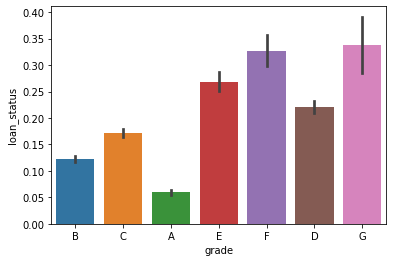

In [86]:
# Plotting default rates across grade of the loan
categoricalplot('grade')

It is clearly as the grade of loan goes from A to G, the default rate increases. This is expected because the grade is decided by bank based on the riskiness of the loan.

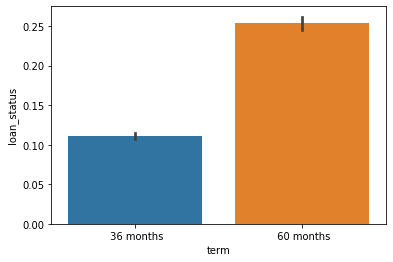

In [87]:
# Plotting default rates across term of the loan
categoricalplot('term')

There is more defaulter rate in 60 months term.

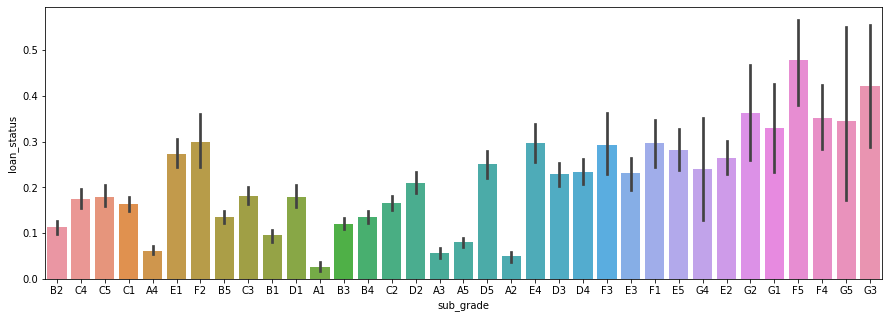

In [88]:
# Plotting default rates across sub grade of the loan
plt.figure(figsize=(15,5))
categoricalplot('sub_grade')

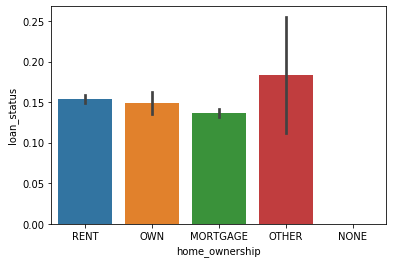

In [89]:
# Plotting default rates across home ownership
categoricalplot('home_ownership')

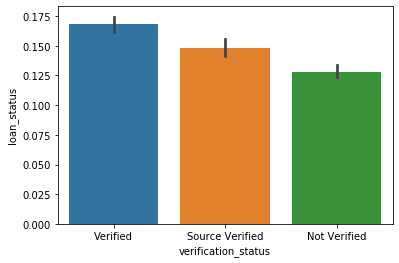

In [90]:
# Plotting default rates across verification status
categoricalplot('verification_status')

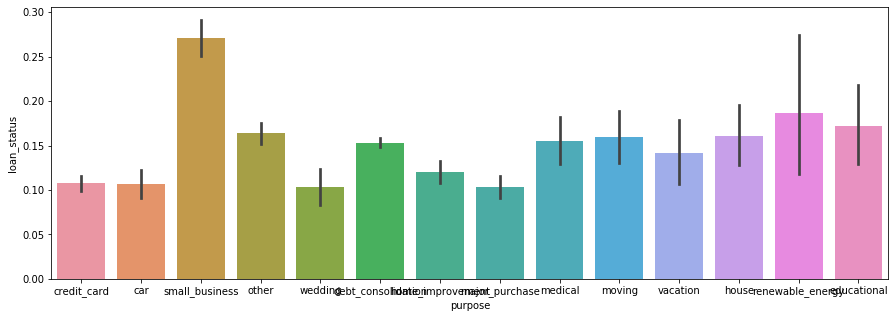

In [91]:
# Plotting default rates across the purpose of the loan
plt.figure(figsize=(15, 5))
categoricalplot('purpose')

In [92]:
# let's also observe the distribution of loans across years
# first lets convert the year column into datetime and then extract year and month from it
df['issue_d'].head()

0    Dec-11
1    Dec-11
2    Dec-11
3    Dec-11
5    Dec-11
Name: issue_d, dtype: object

In [93]:
from datetime import datetime
df['issue_d'] = df['issue_d'].apply(lambda x: datetime.strptime(x, '%b-%y'))

In [94]:
# extracting month and year from issue_date
df['month'] = df['issue_d'].apply(lambda x: x.month)
df['year'] = df['issue_d'].apply(lambda x: x.year)

In [95]:
# let's first observe the number of loans granted across years
df.groupby('year').year.count()

year
2007      251
2008     1562
2009     4716
2010    11532
2011    20516
Name: year, dtype: int64

We can see that the number of loans has increased steadily across years.

In [96]:
# number of loans across months
df.groupby('month').month.count()

month
1     2379
2     2358
3     2691
4     2831
5     2919
6     3180
7     3351
8     3388
9     3498
10    3761
11    4006
12    4215
Name: month, dtype: int64

Most loans are granted in the latter half of the year.

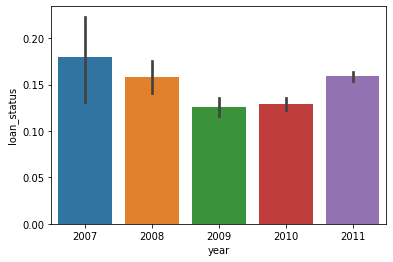

In [97]:
# lets compare the default rates across years
categoricalplot('year')

The default rate had suddenly increased in 2011, inspite of reducing from 2008 till 2010

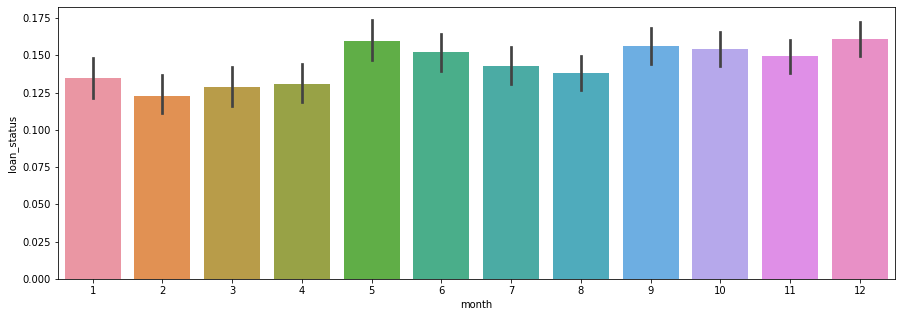

In [98]:
# Now comparing default rates across months
plt.figure(figsize=(15, 5))
categoricalplot('month')

As we can see from the plot there is not much variation across months.

Let's now analyse how the default rate varies across continuous variables.

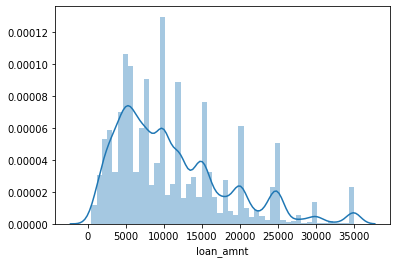

In [99]:
# loan amount
sns.distplot(df['loan_amnt'])
plt.show()

The median loan amount is around 10,000

Let's bin the loan amount variable into small, medium, high, very high so that it is easy to analyse how default rates vary across continous variables.

In [100]:
# binning loan amount
def loan_amount(n):
    if n < 5000:
        return 'low'
    elif n >=5000 and n < 15000:
        return 'medium'
    elif n >= 15000 and n < 25000:
        return 'high'
    else:
        return 'very high'
        
df['loan_amnt'] = df['loan_amnt'].apply(lambda x: loan_amount(x))

In [101]:
df['loan_amnt'].value_counts()

medium       20675
high          7696
low           7444
very high     2762
Name: loan_amnt, dtype: int64

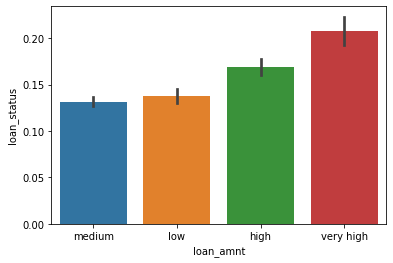

In [102]:
# let's compare the default rates across loan amount type
categoricalplot('loan_amnt')

So, as the loan amount increases, the default rate also increases.

In [103]:
# lets also convert interest rate to low, medium, high
# binning loan amount
def int_rate(n):
    if n <= 10:
        return 'low'
    elif n > 10 and n <=15:
        return 'medium'
    else:
        return 'high'
    
    
df['int_rate'] = df['int_rate'].apply(lambda x: int_rate(x))

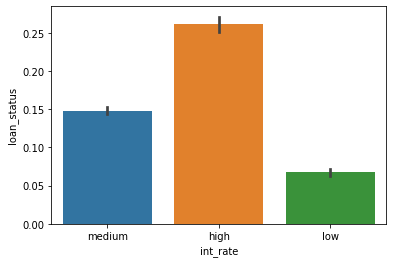

In [104]:
# comparing default rates across rates of interest
categoricalplot('int_rate')

So, high the interest rates, more will be default loans, as expected

In [105]:
# Let's also convert debt to income ratio to low, medium and high
def dti(n):
    if n <= 10:
        return 'low'
    elif n > 10 and n <=20:
        return 'medium'
    else:
        return 'high'
    

df['dti'] = df['dti'].apply(lambda x: dti(x))

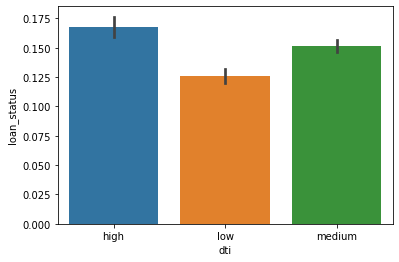

In [106]:
# Comparing default rates across debt to income ratio
categoricalplot('dti')

High debt to income ratio translates into higher default rates.

In [107]:
# funded amount
def funded_amount(n):
    if n <= 5000:
        return 'low'
    elif n > 5000 and n <=15000:
        return 'medium'
    else:
        return 'high'
    
df['funded_amnt'] = df['funded_amnt'].apply(lambda x: funded_amount(x))

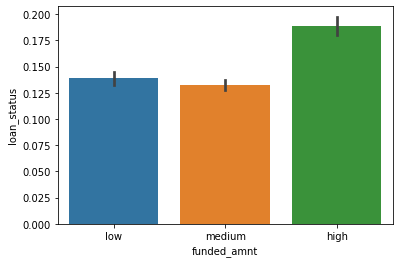

In [108]:
# Comparing default rates across debt to income ratio
categoricalplot('funded_amnt')

In [109]:
# installment
def installment(n):
    if n <= 200:
        return 'low'
    elif n > 200 and n <=400:
        return 'medium'
    elif n > 400 and n <=600:
        return 'high'
    else:
        return 'very high'
    
df['installment'] = df['installment'].apply(lambda x: installment(x))

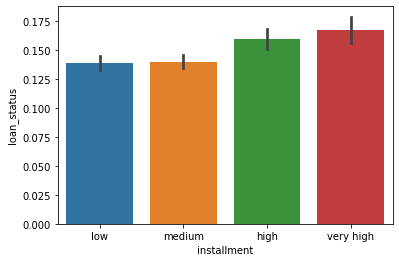

In [110]:
# comparing default rates across installment
categoricalplot('installment')

Higher installment amount leads to higher default rate.

In [111]:
# annual income
def annual_income(n):
    if n <= 50000:
        return 'low'
    elif n > 50000 and n <=100000:
        return 'medium'
    elif n > 100000 and n <=150000:
        return 'high'
    else:
        return 'very high'

df['annual_inc'] = df['annual_inc'].apply(lambda x: annual_income(x))

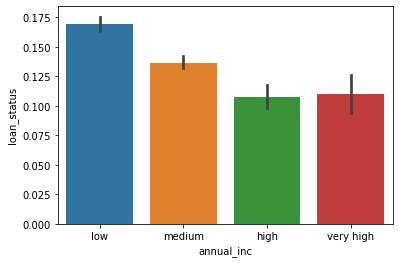

In [112]:
# annual income and default rate
categoricalplot('annual_inc')

Lower the annual income, higher the default rate

## Segmented Univariate Analysis

We have now compared the default rates across various variables, and some of the important predictors are purpose of the loan, interest rate, annual income, grade etc.

In the credit industry, one of the most important factors affecting default is the purpose of the loan - home loans perform differently than credit cards, credit cards are very different from debt condolidation loans etc.

This comes from business understanding, though let's again have a look at the default rates across the purpose of the loan.

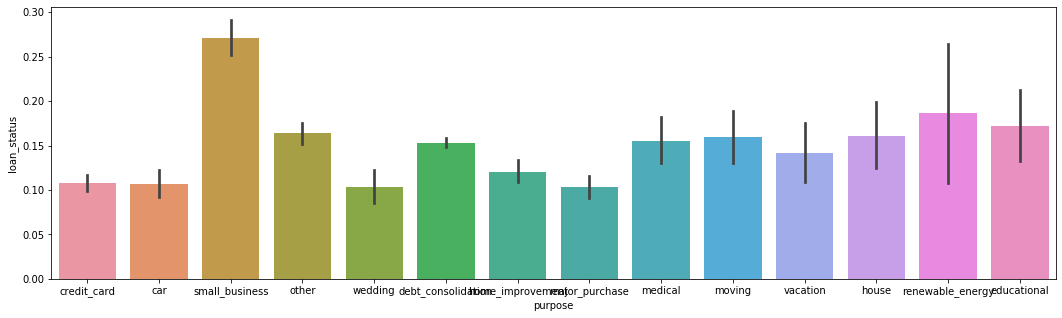

In [113]:
# default rates across the purpose of the loan
plt.figure(figsize=(18,5))
categoricalplot('purpose')
plt.show()

Therefore, small business loans defualt the most, then renewable energy and education

In the upcoming analyses, we will segment the loan applications across the purpose of the loan, since that is a variable affecting many other variables - the type of applicant, interest rate, income, and finally the default rate.

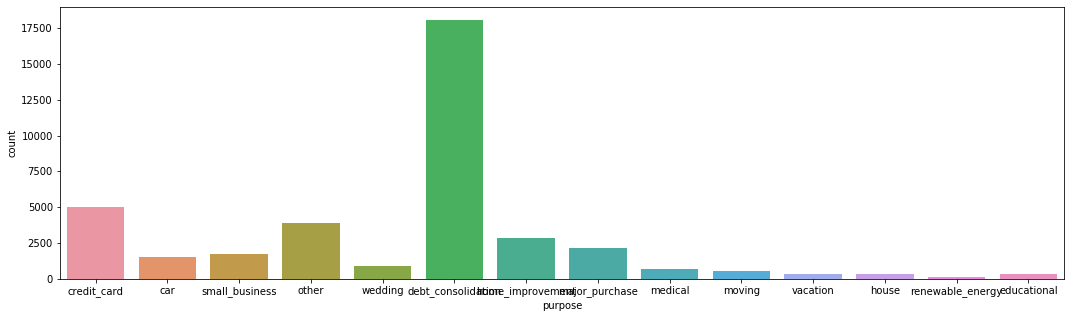

In [114]:
# lets first look at the number of loans for each type (purpose) of the loan
# most loans are debt consolidation (to repay otehr debts), then credit card, major purchase etc.
plt.figure(figsize=(18, 5))
sns.countplot(x='purpose', data=df)
plt.show()

Let's analyse the top 4 types of loans based on purpose: consolidation, credit card, home improvement and major purchase.

In [115]:
# filtering the df for the 4 types of loans mentioned above
main_purposes = ["credit_card","debt_consolidation","home_improvement","major_purchase"]
df = df[df['purpose'].isin(main_purposes)]
df['purpose'].value_counts()

debt_consolidation    18055
credit_card            5027
home_improvement       2875
major_purchase         2150
Name: purpose, dtype: int64

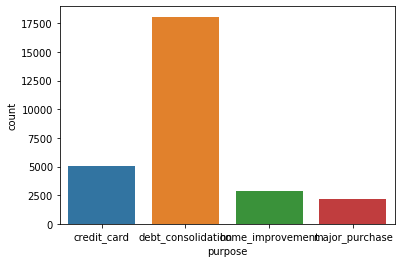

In [116]:
# plotting number of loans by purpose 
sns.countplot(x=df['purpose'])
plt.show()

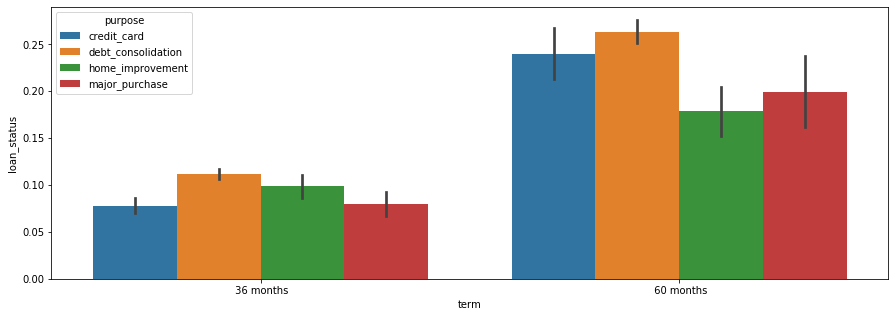

In [117]:
# lets write a function which takes a categorical variable and plots the default rate
# segmented by purpose 

def plot_segmented(cat_var):
    plt.figure(figsize=(15, 5))
    sns.barplot(x=cat_var, y='loan_status', hue='purpose', data=df)
    plt.show()

    
plot_segmented('term')

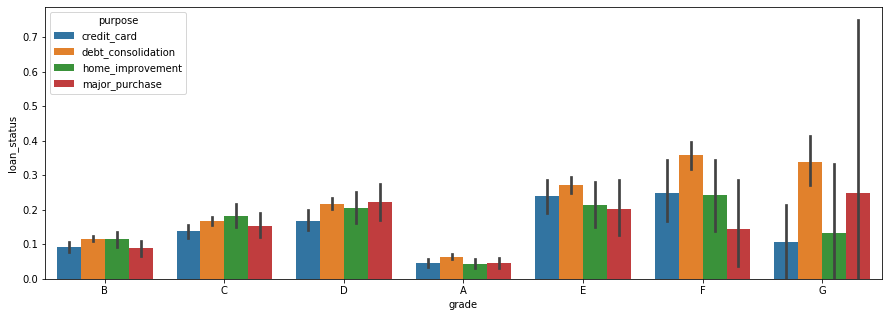

In [118]:
# grade of loan
plot_segmented('grade')

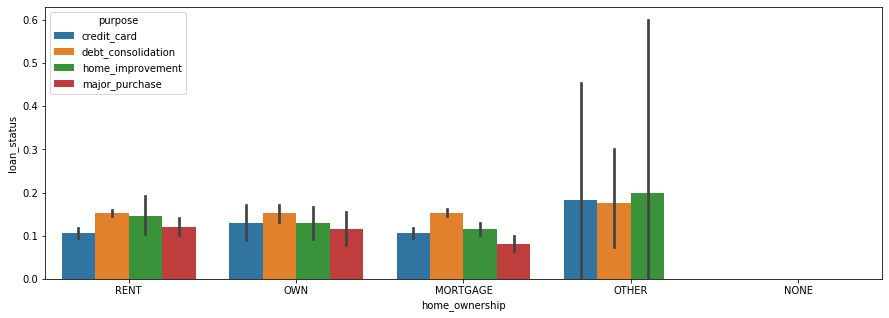

In [119]:
# home ownership
plot_segmented('home_ownership')

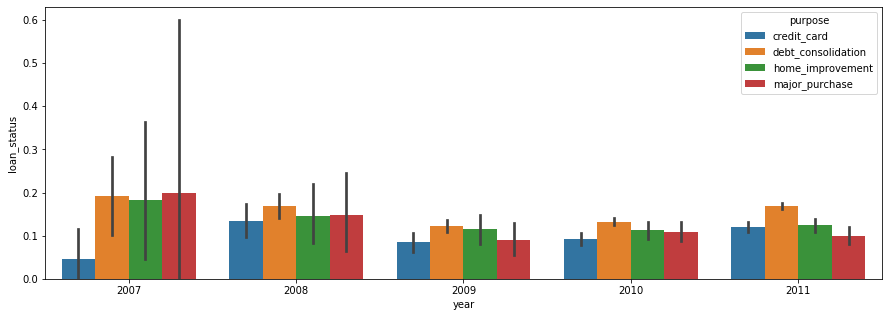

In [120]:
# year
plot_segmented('year')

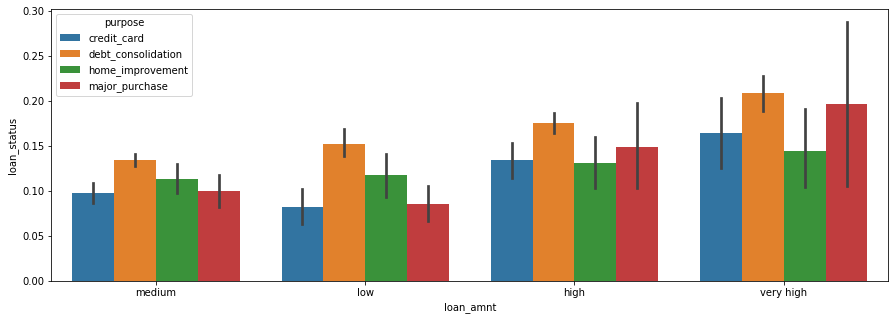

In [121]:
# loan_amnt: same trend across loan purposes
plot_segmented('loan_amnt')

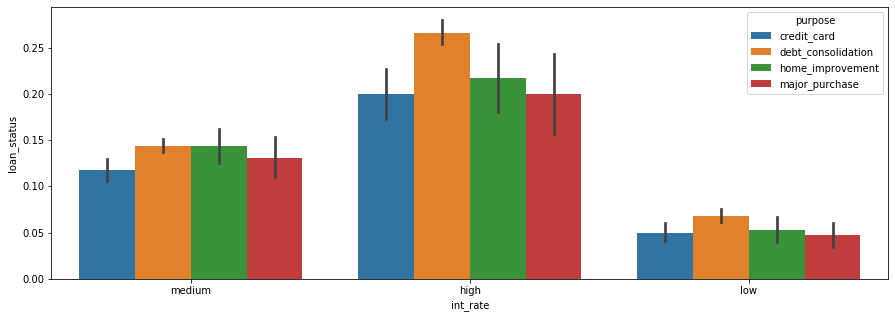

In [122]:
# interest rate
plot_segmented('int_rate')

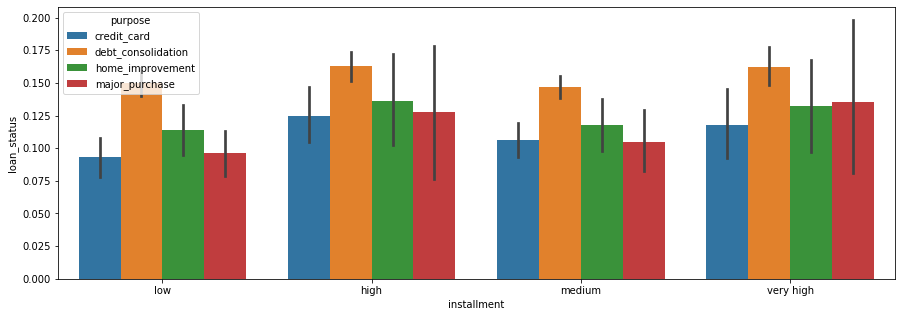

In [123]:
# installment
plot_segmented('installment')

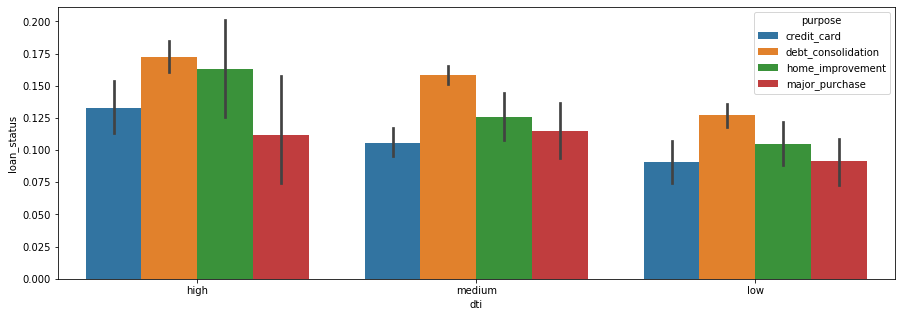

In [124]:
# debt to income ratio
plot_segmented('dti')

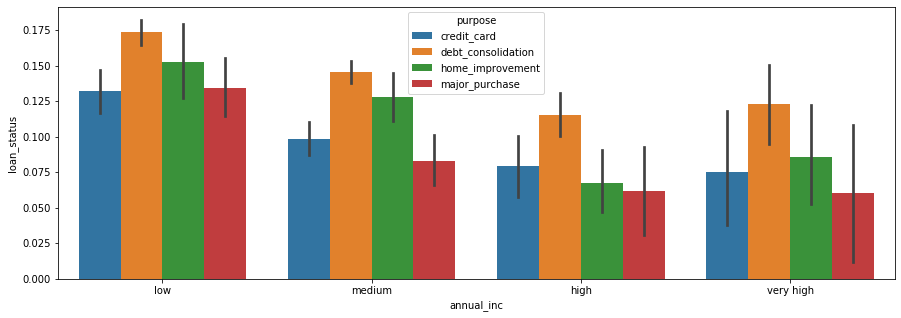

In [125]:
plot_segmented('annual_inc')

In general, debt consolidation loans have the highest default rates.

In [127]:
df.to_excel("C:/Users/user/OneDrive/Documents/UpGrad/Project/df.xlsx")

## Step 4:- Recomendations

The reccomendation after the analysis are:

1. There is more defaulter rate in 60 months term of loan as compared to 36 month term of loan.
2. The default rate had suddenly increased in 2011, inspite of reducing from 2008 till 2010.
3. High interest rates leads to more defaulters.
4. High debt to income ratio translates into higher default rates.
5. Higher installment amount leads to higher default rates.
6. Lower the annual income, higher the default rate
7. In general, debt consolidation loans have the highest default rates.
